<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW2_GD_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 2: Градиентный спуск (pro)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание - 10.

## Часть 2 (практическая).

## Задание 2 (**1 балл**)

Дана функция: $$f(x) = x\cdot sin(5x) + 0.1 \cdot x^2$$

Для этой функции:

- [ ] Реализуйте (или возьмите рассмотренный на занятии) метод градиетного спуска с условием остановки `stop=1e^-6` и шагом `eta=0.001`. **Градиетный спуск обязательно должен сохранять траекторию движения.**
- [ ] Задайте стартовые точки x0, равные 0, 0.5, 1
- [ ] Реализуйте нахождение точек минимума и максимума функции $f(x)$ (для нахождения максимума нам нужно в направлении градиента, а не антиградиента)
- [ ] Проанализируйте результаты. Предположите, с чем они связаны. Ответьте на вопросы:
    - Чему равны значения экстремумов?
    - При старте из какой начальной точки найденные экстремумы совпадут?




In [46]:
import numpy as np
from tqdm import tqdm
import time
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
# Функция и её производная
def f(x):
    return x * np.sin(5 * x) + 0.1 * x**2

def df(x):
    return np.sin(5 * x) + 5 * x * np.cos(5 * x) + 0.2 * x

# Градиентный спуск
def gradient_descent(f, df, x0, eta, max_iter=1000, tol=1e-6, grad_type="min"):
    x = x0
    path = []
    path.append(x)
    for i in range(max_iter):
        grad = df(x)
        if grad_type == "max":
            x = x + eta * grad
        else:
            x = x - eta * grad
        path.append(x)
        if np.abs(grad) < tol:
            break
    return x, path

# Поиск экстремумов
def find_points(f, df, x0, eta, max_iter=1000, tol=1e-6):
    min_x, min_path = gradient_descent(f, df, x0, eta, max_iter, tol, grad_type="min")
    max_x, max_path = gradient_descent(f, df, x0, eta, max_iter, tol, grad_type="max")
    return min_x, max_x, min_path, max_path

In [48]:
x0_values = [0, 0.5, 1]
eta = 0.001

results = {}
for x0 in x0_values:
    min_x, max_x, min_path, max_path = find_points(f, df, x0, eta)
    results[x0] = {
        "min_x": min_x,
        "max_x": max_x,
        "min_f": f(min_x),
        "max_f": f(max_x),
    }

for x0, res in results.items():
    print(f"Стартовая точка x0 = {x0}:")
    print(f"  Минимум: x = {res['min_x']:.6f}, f(x) = {res['min_f']:.6f}")
    print(f"  Максимум: x = {res['max_x']:.6f}, f(x) = {res['max_f']:.6f}")

Стартовая точка x0 = 0:
  Минимум: x = 0.000000, f(x) = 0.000000
  Максимум: x = 0.000000, f(x) = 0.000000
Стартовая точка x0 = 0.5:
  Минимум: x = 0.975099, f(x) = -0.867075
  Максимум: x = 0.411784, f(x) = 0.380650
Стартовая точка x0 = 1:
  Минимум: x = 0.975099, f(x) = -0.867075
  Максимум: x = 1.603553, f(x) = 1.839232


при старте из точки 0 значения экстремумов совпадают

## Задание 3 (**0.5 балла**).
Напишите функцию, вычисляющую значение весов в линейной регрессии по точной (аналитически найденной) формуле.

In [49]:
def ols_solution(X, y):
    X = np.column_stack((np.ones(X.shape[0]), X)) # добавляю столбец из единиц для учета свободного члена

    w = np.linalg.inv(X.T @ X) @ X.T @ y

    return w

## Задание 5 (**1 балл**).
Модифицируйте метод градиентного спуска с семинара так, чтобы это теперь был метод стохастического градиентного спуска.

In [50]:
def compute_cost(X, y, theta):
    m = len(y)

    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

In [51]:
def stochastic_gradient_descent(X, y, learning_rate, iterations):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations, 1))

    for i in tqdm(range(iterations)):
        random_index = np.random.randint(m)
        X_i = X[random_index, :].reshape(1, -1)
        y_i = y[random_index]

        gradient = 2./m * (X_i.T @ ((X_i @ params) - y_i))

        params = params - learning_rate * gradient

        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

## Задание 6 (**3 балла**).
* **(0 баллов)**. Скопируйте метод градиентного спуска из семинара в этот ноутбук.

* **(0.5 балла)**. Обучите линейную регрессию на данных, сгенерированных ниже, тремя методами (по точной формуле, с помощью GD и с помощью SGD) на данных для задачи регрессии (см. код). Для GD и SGD используйте learning_rate = 0.01, iterations=10000.

* **(0.5 балла)**. С помощью каждого метода сделайте предсказание (на всех данных), вычислите качество предсказания r2 (from sklearn.metrics import r2_score). Для получения предсказания можете использовать функцию predict с семинара.


Ответьте на следующие вопросы (каждый вопрос - **0.5 балла**):

1) все ли методы справились с нахождением минимума? если нет, то почему какой-то из методов не справился?

2) сравните время работы методов (используйте библиотеку time): замеряйте время работы соответствующей написанной вами функции.

3) для методов GD и SGD нарисуйте графики (для каждого свой) зависимости ошибки (loss) от номера итерации.

4) какой метод успешнее всего справился с задачей? (т.е. r2 наибольший).

In [52]:
def gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations,1))

    for i in tqdm(range(iterations)):
        params = params - 2./m * learning_rate * (X.T @ ((X @ params) - y))
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

In [53]:
def predict(X, params):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ params

In [54]:
X, y, _ = make_regression(n_samples=100000,#number of samples
                          n_features=10,#number of features
                          n_informative=8,#number of useful features
                          noise=100,#bias and standard deviation of the guassian noise
                          coef=True,#true coefficient used to generated the data
                          random_state=123)

X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]))
X[10] = X[6] + X[7] + np.random.random()*0.01

In [55]:
learning_rate = 0.01
iterations = 10000

In [56]:
%%time
params_ols = ols_solution(X, y)
y_pred_ols = predict(X, params_ols)
r2_ols = r2_score(y, y_pred_ols)
print(f"OLS: R^2 = {r2_ols:.4f}")

OLS: R^2 = 0.7535
CPU times: user 187 ms, sys: 1.06 s, total: 1.25 s
Wall time: 217 ms


In [57]:
%%time
cost_track_gd, params_gd = gradient_descent(X, y, learning_rate, iterations)
y_pred_gd = predict(X, params_gd)
r2_gd = r2_score(y, y_pred_gd)
print(f"GD: R^2 = {r2_gd:.4f}")

100%|██████████| 10000/10000 [05:27<00:00, 30.53it/s]


GD: R^2 = 0.7555
CPU times: user 3min 29s, sys: 18min 6s, total: 21min 36s
Wall time: 5min 27s


In [58]:
%%time
cost_track_sgd, params_sgd = stochastic_gradient_descent(X, y, learning_rate, iterations)
y_pred_sgd = predict(X, params_sgd)
r2_sgd = r2_score(y, y_pred_sgd)
print(f"SGD: R^2 = {r2_sgd:.4f}")

100%|██████████| 10000/10000 [02:43<00:00, 61.17it/s]


SGD: R^2 = 0.0215
CPU times: user 1min 46s, sys: 8min 56s, total: 10min 42s
Wall time: 2min 43s


In [59]:
def plot_loss(cost_track, iterations, grad_type="GD"):
    iterations_range = np.arange(1, iterations + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(iterations_range, cost_track, label=grad_type, color="blue", linewidth=2)

    plt.title(f"Падение функции потерь дл {grad_type}", fontsize=16)
    plt.xlabel("Итерации", fontsize=14)
    plt.ylabel("Функция потерь (Loss)", fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

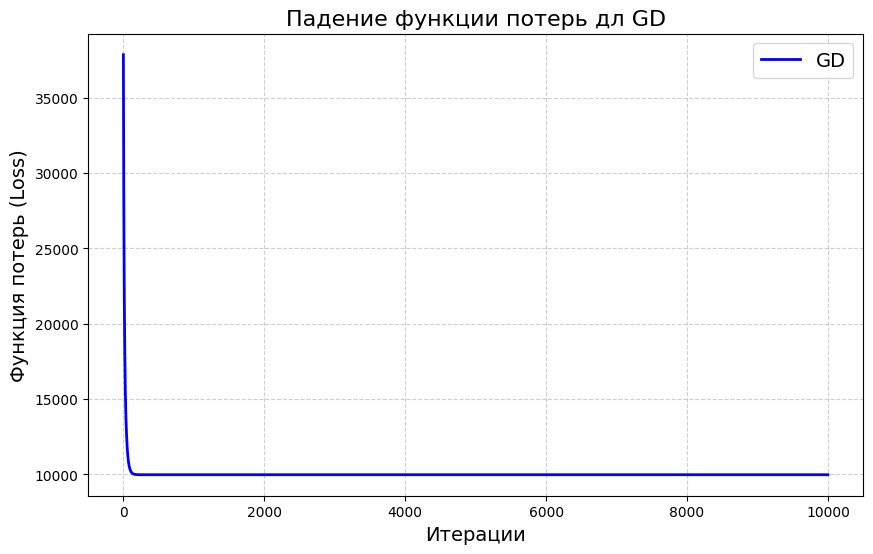

In [60]:
plot_loss(cost_track_gd, iterations)

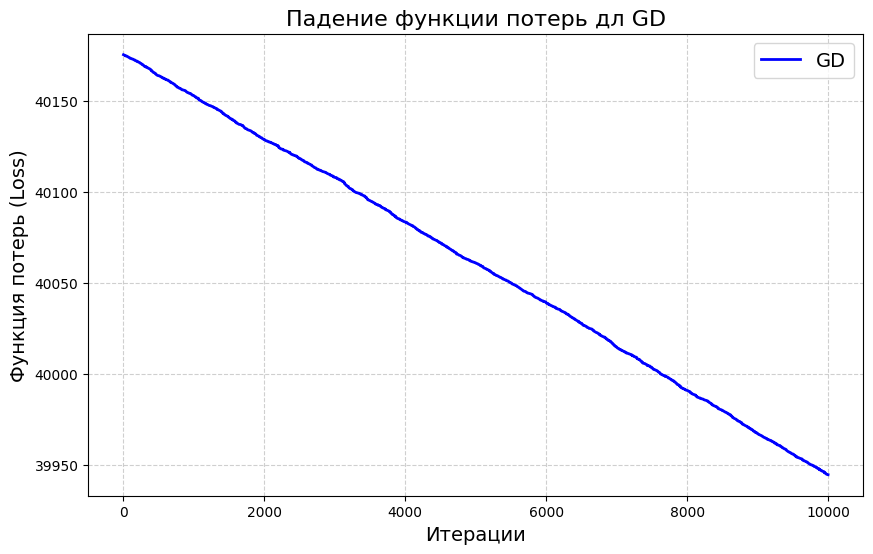

In [61]:
plot_loss(cost_track_sgd, iterations, grad_type="GD")

Видим, что SGD плохо справился с задачей, большой лосс и маленький R^2. Судя по графикам ему сильно не хватило итераций для того, чтобы сойтись

## Задание 7 (1.5 балла).

* **(0.5 балла)**. Добавьте в функцию из задания 5 L2-регуляризацию и, соответственно, новый аргумент - коэффициент при регуляризаторе.

* **(1 балл)**. На сгенерированных выше данных обучите модифицированный алгоритм SGD с регуляризацией: в цикле перебирайте значения коэффициента регуляризации от 0.1 до 1 с шагом 0.1. Для каждого значения обучите модель и сделайте предсказание, выведите значение r2. Для какого значения коэффициента регуляризации получилось наилучшее качество r2, почему?

In [62]:
def stochastic_gradient_descent_reg(X, y, learning_rate, iterations, lambda_reg=0.0):
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations, 1))

    for i in range(iterations):
        random_index = np.random.randint(m)
        X_i = X[random_index, :].reshape(1, -1)
        y_i = y[random_index]

        gradient = (2 / m) * (X_i.T @ ((X_i @ params) - y_i)) + (2 * lambda_reg * params)

        params = params - learning_rate * gradient

        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

In [63]:
lambda_values = np.arange(0.1, 1.1, 0.1)

for lambda_reg in lambda_values:
    cost_track_sgd, params_sgd = stochastic_gradient_descent_reg(X, y, learning_rate, iterations, lambda_reg)

    y_pred_sgd = predict(X, params_sgd)

    r2 = r2_score(y, y_pred_sgd)
    print(f"Lambda = {lambda_reg:.1f}, R^2 = {r2:.4f}")

Lambda = 0.1, R^2 = 0.0003
Lambda = 0.2, R^2 = 0.0001
Lambda = 0.3, R^2 = 0.0001
Lambda = 0.4, R^2 = 0.0001
Lambda = 0.5, R^2 = 0.0000
Lambda = 0.6, R^2 = 0.0000
Lambda = 0.7, R^2 = 0.0000
Lambda = 0.8, R^2 = 0.0000
Lambda = 0.9, R^2 = 0.0000
Lambda = 1.0, R^2 = 0.0000


## Задание 8 (2 балла)

Реализуйте на выбор одну из оптимизаций градиентного спуска - Momentum или  AdaGrad. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

In [64]:
def modified_grad_descent(X, y, learning_rate, iterations, epsilon=1e-8):
    """
    Adagrad
    """
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    params = np.random.rand(X.shape[1])

    grad_squared = np.zeros_like(params)

    m = X.shape[0]

    cost_track = np.zeros((iterations, 1))

    for i in tqdm(range(iterations)):
        gradient = (2 / m) * (X.T @ ((X @ params) - y))

        grad_squared += gradient ** 2

        params = params - (learning_rate / (np.sqrt(grad_squared) + epsilon)) * gradient

        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

In [65]:
epsilon = 1e-8

cost_track_adagrad, params_adagrad = modified_grad_descent(X, y, learning_rate, iterations, epsilon)

y_pred_adagrad = predict(X, params_adagrad)

r2_adagrad = r2_score(y, y_pred_adagrad)
print(f"Adagrad: R^2 = {r2_adagrad:.4f}")

100%|██████████| 10000/10000 [05:58<00:00, 27.92it/s]


Adagrad: R^2 = 0.0802
